# Logistic Regression

In this presentation, we combine the lesson on Logistic Regression from [DeepLearning.ai](https://www.coursera.org/learn/neural-networks-deep-learning) and the insights on doing Logistic Regression from [Udemy's Machine Learning](https://www.udemy.com/machinelearning).  The DeepLearning.ai material formulates Logistic Regression "with a Neural Network mindset", while Udemy's approach is to use the tools available through sklearn.

# Logistic Regression with a Neural Network mindset

Build a logistic regression classifier to recognize  cats. This steps you through how to do this with a Neural Network mindset and hones your intuitions about deep learning.

**Instructions:**
- Do not use loops (for/while) in the code, unless the instructions explicitly ask you to do so.

**We will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 - Packages

First, run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from utils.lr_utils import load_dataset


%matplotlib inline

## 2 - Overview of the Problem set

**Problem Statement**: Given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Add "\_orig" at the end of image datasets (train and test) because they are going to be preprocessed. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. Visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

y = [1], it's a 'cat' picture.


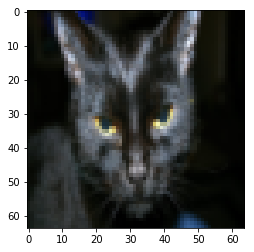

In [3]:
# Examples of pictures
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

y = [1], it's a 'cat' picture.


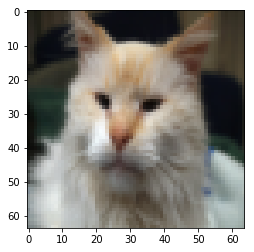

In [4]:
index = 27
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

**Exercise:** Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [5]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>


For convenience, reshape images of shape (num_px, num_px, 3) into a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [6]:
# Reshape the training and test examples
# Flatten the data
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

During the training of the model, we multiply weights and add biases to some initial inputs in order to observe neuron activations. Then we backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode.

Standardize the dataset.

In [7]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## 3 - General Architecture of the learning algorithm

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

We can often build 1-3 separately and integrate them into one function we will call `model()`.

### 4.1 - Helper functions

Implement `sigmoid()`. As seen in the figure above, we need to compute $sigmoid( w^T x + b)$ to make predictions.

In [8]:
# sigmoid function
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1 / (1 + np.exp(-z))
    
    return s

In [9]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.999898970806


**Expected Output**: 

<table style="width:20%">
  <tr>
    <td>**sigmoid(0)**</td>
    <td> 0.5</td> 
  </tr>
  
  <tr>
    <td>**sigmoid(9.2)**</td>
    <td> 0.999898970806 </td> 
  </tr>
</table>

### 4.2 - Initializing parameters

Implement parameter initialization in the cell below. To initialize w as a vector of zeros, use np.zeros() from Numpy.

In [10]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros(shape=(dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [11]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.]
 [ 0.]]
b = 0


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [12]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [13]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.99993216]
 [ 1.99980262]]
db = 0.499935230625
cost = 6.00006477319


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
        <td> [[ 0.99993216]
 [ 1.99980262]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.499935230625 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 6.000064773192205</td>
    </tr>

</table>

### 4.4 Optimization

- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [14]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [15]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 0.1124579 ]
 [ 0.23106775]]
b = 1.55930492484
dw = [[ 0.90158428]
 [ 1.76250842]]
db = 0.430462071679


**Expected Output**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.1124579 ]
 [ 0.23106775]] </td>
    </tr>
    
    <tr>
       <td> **b** </td>
       <td> 1.55930492484 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.90158428]
 [ 1.76250842]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.430462071679 </td>
    </tr>

</table>

The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [16]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [17]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[ 1.  1.]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.]]
         </td>  
   </tr>

</table>


<font color='blue'>
**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## 5 - Merge all functions into a model

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [18]:
# model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [19]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**Expected Output**: 

<table style="width:40%"> 
    
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 99.04306220095694 % </td>
    </tr>

    <tr>
        <td>**Test Accuracy** </td> 
        <td> 70.0 % </td>
    </tr>
</table> 




**Comment**: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test error is 70%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier next week!

Also, you see that the model is clearly overfitting the training data. Later in this specialization you will learn how to reduce overfitting, for example by using regularization. Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

y = 0, you predicted that it is a "cat" picture.


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


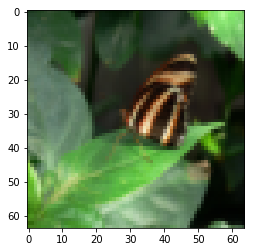

In [20]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0, index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0, index]].decode("utf-8") +  "\" picture.")

Let's also plot the cost function and the gradients.

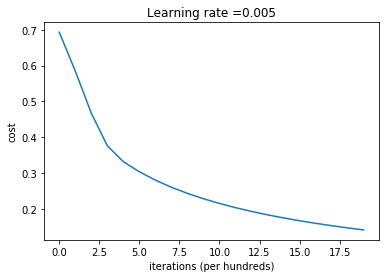

In [21]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

## 6 - Further analysis

This is an image classification model based on Logistic Regression. Let's analyze it further, and examine possible choices for the learning rate $\alpha$. 

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work, the learning rate must be chosen wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large, the run may "overshoot" the optimal value. Similarly, if the learning rate is too small it will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of the model with several choices of learning rates. Run the cell below. This should take a few minutes. We try different values as `learning_rates` to see what happens. 

learning rate is: 0.02
train accuracy: 100.0 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.005
train accuracy: 97.60765550239235 %
test accuracy: 70.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0005
train accuracy: 82.77511961722487 %
test accuracy: 56.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



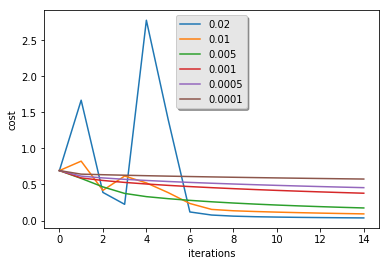

In [22]:
learning_rates = [0.02, 0.01, 0.005, 0.001, 0.0005, 0.0001] # 0.1 fails to converge giving NaNs
models = {}
for alpha in learning_rates:
    print ("learning rate is: " + str(alpha))
    models[str(alpha)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = alpha, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for alpha in learning_rates:
    plt.plot(np.squeeze(models[str(alpha)]["costs"]), label= str(models[str(alpha)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.) 


## 7 - Test with your own image

y = 0.0, your algorithm predicts a "non-cat" picture.


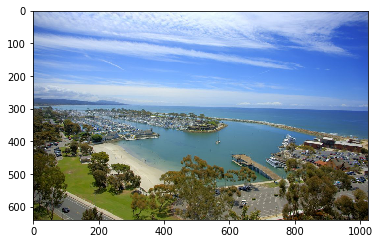

In [23]:
my_image = "dana-point-harbor-beach-e1425595853614-1024x640.jpg"

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
      classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 1.0, your algorithm predicts a "cat" picture.


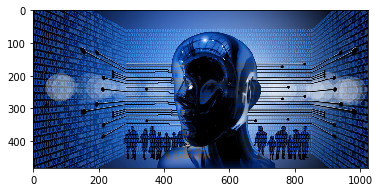

In [24]:
my_image = "artificial-2970158_1280-1024x482.jpg"

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
      classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

**Obviously, the head is not a cat.  We need to have more training cases of heads/cats/dogs properly labeled.**

y = 0.0, your algorithm predicts a "non-cat" picture.


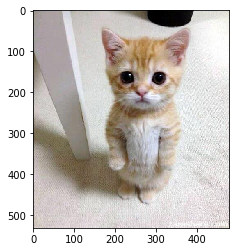

In [25]:
my_image = "Cute-Cat.jpg"

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
      classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

**This is a meme of a cat.  The head is quite obviously a cat, but the algorithm fails on this while totally messing up on the previous example.  Again - I think more training cases are needed.  Let's try something that is going to work properly.**

y = 1.0, your algorithm predicts a "cat" picture.


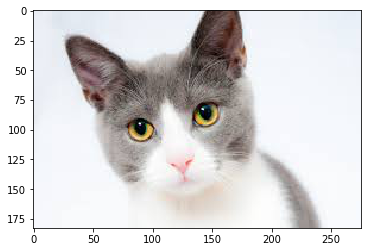

In [26]:
my_image = "cat.jpg"

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
      classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

<font color='blue'>
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!
4. More training data is always desireable!

The are different things to try in the Notebook. These include:
    - Play with the learning rate and the number of iterations
    - Try different initialization methods and compare the results
    - Test other preprocessings (center the data, or divide each row by its standard deviation)

#### Train some more and retry some of the images above

This still won't work - we need more labeled data!

In [27]:
d2 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 5000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Cost after iteration 2000: 0.135608
Cost after iteration 2100: 0.130708
Cost after iteration 2200: 0.126137
Cost after iteration 2300: 0.121861
Cost after iteration 2400: 0.117855
Cost after iteration 2500: 0.114093
Cost after iteration 2600: 0.110554
Cost after iteration 2700: 0.107219
Cost

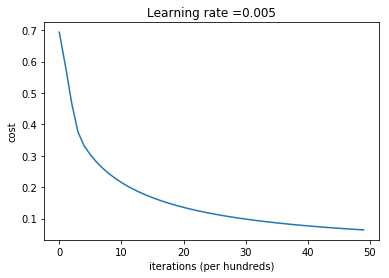

In [28]:
# Plot learning curve (with costs)
costs = np.squeeze(d2['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

y = 0.0, your algorithm predicts a "non-cat" picture.


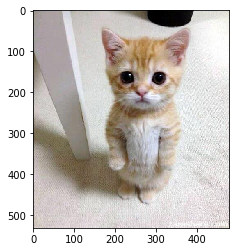

In [29]:
# Try the meme above again - this still won't work - need more training data or perhaps to trim the picture?
my_image = "Cute-Cat.jpg"

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d2["w"], d2["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
      classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 0.0, your algorithm predicts a "non-cat" picture.


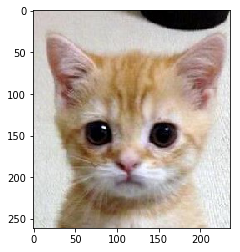

In [30]:
# Try the meme above, but trim to just the head.  This still doesn't work - definitely need more training data
# or perhaps a deeper net.
my_image = "Cute-Cat-Trimmed.jpg"

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d2["w"], d2["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
      classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

In the comment above, I noted that more training data might help, but also a deep net might be much better!  This is what I think happened as researchers realized that shallow nets just won't do the trick sometimes.

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c

# Udemy Approach Applied to the Classification of Tumors

Cats are cute, but classification of cats doesn't solve problems that make the world better.  Therefore, let's look at the Kaggle problem of the classification of tumors.

Furthermore, coding everything up is fine for learning, but let's see how to do it with existing toolkits in Python.  A lot of this comes from the Udemy Course on [machine learning](https://www.udemy.com/machinelearning).

First, get the data from [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).  The categorical diagnosis variable is either "B" for benign or "M" for malignant.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("datasets/breast-cancer-wisconsin-data.csv")

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

I'm not a oncologist, but my own life experience indicates that radius and texture are important features to consider in classification of a tumor.  Let's take a look.

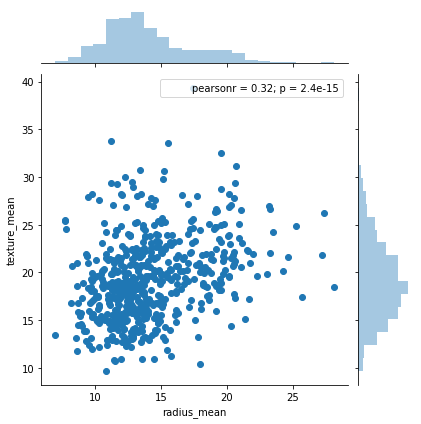

In [33]:
sns.jointplot('radius_mean', 'texture_mean', data=dataset)


In [34]:
X = dataset[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']]
y = dataset['diagnosis']
X.columns = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']
y.columns = ['diagnosis']

Normalize each column (feature) of the dataset.

In [35]:
from sklearn import preprocessing

x = X.values #returns a numpy array

xx = np.array(dataset[['radius_worst', 'texture_worst']].values, copy=True)

min_max_scaler = preprocessing.MinMaxScaler()

# We could also opt for the Standard Scalar
# standard_Scalar = preprocessing.StandardScaler()

x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

Split into training and test sets.  Remember that we always prefer more training data then test data.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.columns = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']
X_test.columns = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']
y_train.columns = ['diagnosis']
y_test.columns = ['diagnosis']

When we were doing everything by hand above, we had to flatten the data.  However, when we use existing toolkits, those details are taken care of by the Logistic Regression code.

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for the LogisticRegression class.  Let's try a few different options for the classifier ...

## Confusion Matrices and ROC Curves
Let us consider a two-class prediction problem (binary classification), in which the outcomes are labeled either as positive (p) or negative (n). There are four possible outcomes from a binary classifier. If the outcome from a prediction is p and the actual value is also p, then it is called a true positive (TP); however if the actual value is n then it is said to be a false positive (FP). Conversely, a true negative (TN) has occurred when both the prediction outcome and the actual value are n, and false negative (FN) is when the prediction outcome is n while the actual value is p.

To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Let us define an experiment from P positive instances and N negative instances for some condition. The four outcomes can be formulated in a 2×2 contingency table or confusion matrix, as follows ([Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)):

<table style="border:none; margin-top:0;">
<tr>
<th style="background:white; border:none;" colspan="2" rowspan="2"></th>
<th colspan="3" style="background:none;">Actual class</th>
</tr>
<tr>
<th>Cat</th>
<th>Non-cat</th>
</tr>
<tr>
<th rowspan="3" style="height:6em;">
<div style="display: inline-block; -ms-transform: rotate(-90deg); -webkit-transform: rotate(-90deg); transform: rotate(-90deg);;">Predicted<br />
class</div>
</th>
<th>Cat</th>
<td>True Positives</td>
<td>False Positives</td>
</tr>
<tr>
<th>Non-cat</th>
<td>False Negatives</td>
<td>True Negatives</td>
</tr>
</table>

### Terminology and derivations from a confusion matrix

**Condition Positive (P)** - the number of real positive cases in the data  
**Condition Negatives (N)** - the number of real negative cases in the data  
**True Positive (TP)** - equivalent to a hit  
**True Negative (TN)** - equivalent to a correct rejection    
**False Positive (FP)** - equivalent with false alarm, [Type I error](https://en.wikipedia.org/wiki/Type_I_error)  
**False Negative (FN)** - equivalent with a miss, [Type II error](https://en.wikipedia.org/wiki/Type_II_error) 

**Sensitivity, recall, hit rate, or true positive rate (TPR)** 

$\mathrm{TPR} = \frac{\mathrm{TP}}{P} = \frac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FN}}$

**Specificity or true negative rate (TNR)** 

$\mathrm{TNR} = \frac{\mathrm{TN}}{N} = \frac{\mathrm{TN}}{\mathrm{TN} + \mathrm{FP}}$

**Precision or positive predictive value (PPV)**  

$\mathrm{PPV} =\frac{\mathrm {TP}}{\mathrm{TP} + \mathrm{FP}}$

**Negative predictive value (NPV)**  

$\mathrm{NPV} = \frac{\mathrm{TN}}{\mathrm{TN} +\mathrm {FN}}$

**Miss rate or false negative rate (FNR)**

$\mathrm{FNR} = \frac{\mathrm{FN}}{P} =  \frac{\mathrm{FN}}{\mathrm{FN} + \mathrm{TP}} = 1 - \mathrm{TPR}$

**Fall-out or false positive rate (FPR)**

$\mathrm{FPR} = \frac{\mathrm{FP}}{N} = \frac{\mathrm{FP}}{\mathrm{FP} + \mathrm{TN}} = 1 - \mathrm{TNR}$

**False discovery rate (FDR)**

$\mathrm{FDR} = \frac{\mathrm {FP}}{\mathrm{FP} + \mathrm{TP}} = 1 - \mathrm{PPV}$

**False omission rate (FOR)**

$\mathrm{FOR} = \frac{\mathrm{FN}}{\mathrm{FN} + \mathrm{TN} } = 1 - \mathrm{NPV}$

**Accuracy (ACC)**

$\mathrm{ACC} =  \frac{\mathrm{TP} + \mathrm{TN}}{P+N} = \frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{TP} + \mathrm{TN} + \mathrm{FP} + \mathrm{FN} }$

**F1 score is the harmonic mean of precision and sensitivity**

$F_{1} = 2\cdot  \frac{\mathrm{PPV} \cdot \mathrm {TPR}}{\mathrm{PPV} + \mathrm{TPR}} = \frac{2 \mathrm{TP}}{2 \mathrm{TP} + \mathrm{FP} + \mathrm{FN}}$

**Matthews correlation coefficient (MCC)**

$\mathrm{MCC} = \frac{\mathrm{TP} \times \mathrm{TN} - \mathrm{FP} \times \mathrm{FN} }{\sqrt{(\mathrm {TP} + \mathrm {FP} )(\mathrm {TP} + \mathrm{FN} )(\mathrm{TN} + \mathrm{FP} )(\mathrm{TN} + \mathrm {FN} )}}$

**Informedness or Bookmaker Informedness (BM)**

$\mathrm{BM} = \mathrm{TPR} + \mathrm{TNR} - 1$

**Markedness (MK)**

$\mathrm{MK} = \mathrm{PPV} + \mathrm{NPV} -1$


### ROC Curve

An ROC curve demonstrates several things:

1. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
4. The slope of the tangent line at a cutpoint gives the likelihood ratio (LR) for that value of the test.
5. The area under the curve (AUC) is a measure of text accuracy.  An area of 1 represents a perfect test; an area of .5 represents a worthless test. A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:

| Area    | Quality of Fit |
| ------- | -------------- |
| .90-1   | excellent (A)  |
| .80-.90 | good (B)       |
| .70-.80 | fair (C)       |
| .60-.70 | poor (D)       |
| .50-.60 | fail (F)       |

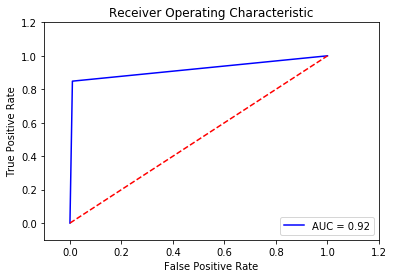

In [37]:
from sklearn import linear_model
from sklearn import metrics

classifier = linear_model.LogisticRegression(random_state=0, solver='newton-cg', penalty='l2')
classifier.fit(X_train, y_train) 

# Predict the test set results
y_pred = classifier.predict(X_test)

y_testv = y_test
y_predv = pd.Series(y_pred.flatten())
y_testv = np.asarray(y_testv.replace('B', 0).replace('M', 1))
y_predv = np.asarray(y_predv.replace('B', 0).replace('M', 1))
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_testv, y_predv)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

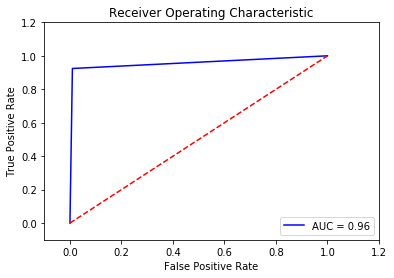

In [38]:
classifier = linear_model.LogisticRegression(random_state=0, solver='liblinear', penalty='l1')
classifier.fit(X_train, y_train) 

# Predict the test set results
y_pred = classifier.predict(X_test)

y_testv = y_test
y_predv = pd.Series(y_pred.flatten())
y_testv = np.asarray(y_testv.replace('B', 0).replace('M', 1))
y_predv = np.asarray(y_predv.replace('B', 0).replace('M', 1))
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_testv, y_predv)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Training Set Plot

In the following plots, benign is the first color of the plot and the 'o' marker, malignant is the second color and the '+' marker.

In [39]:
# Create a plotting array
x_training_plot = np.zeros(shape=(X_train.shape[0], 2))
y_training_plot = pd.Series(np.asarray(y_train))
j = 0
for i, row in X_train.iterrows():
    x_training_plot[j,0] = xx[i,0]
    x_training_plot[j,1] = xx[i,1]
    j = j+1

x_training_plot = pd.DataFrame(x_training_plot)
x_training_plot.columns = ['radius_worst', 'texture_worst']

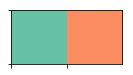

In [40]:
# Generate some colors and markers
colors = sns.color_palette("Set2", 2)
sns.palplot(colors)
markers = ['o','x']*120

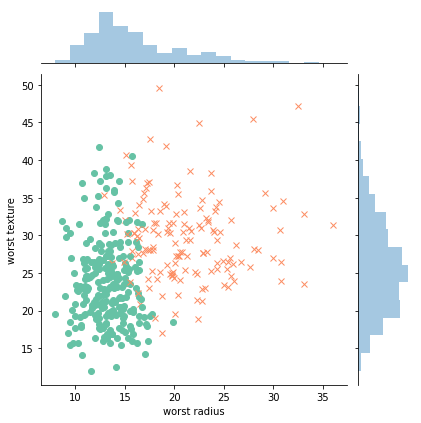

In [41]:
jplot = sns.jointplot('radius_worst', 'texture_worst', data=x_training_plot)
jplot.ax_joint.cla() # Clear the scatter plot

for i, row in x_training_plot.iterrows():
    color = colors[0] if y_training_plot[i]=='B' else colors[1]
    marker = markers[0] if y_training_plot[i] == 'B' else markers[1]
    jplot.ax_joint.plot(row['radius_worst'], row['texture_worst'], color=color, marker=marker)
jplot.set_axis_labels('worst radius', 'worst texture')


### Test Set Plot

In [42]:
# Create a plotting array
x_testing_plot = np.zeros(shape=(X_test.shape[0], 2))
y_testing_plot = pd.Series(np.asarray(y_test))
j = 0
for i, row in X_test.iterrows():
    x_testing_plot[j,0] = xx[i,0]
    x_testing_plot[j,1] = xx[i,1]
    j = j+1

x_testing_plot = pd.DataFrame(x_testing_plot)
x_testing_plot.columns = ['radius_worst', 'texture_worst']

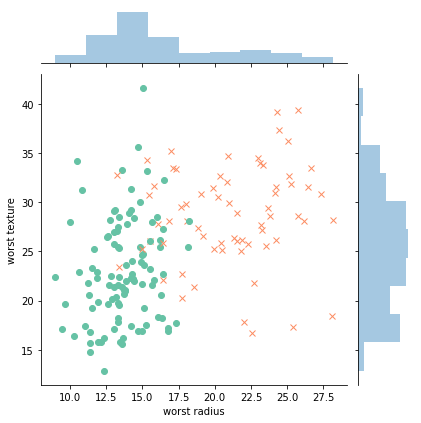

In [43]:
jplot = sns.jointplot('radius_worst', 'texture_worst', data=x_testing_plot)
jplot.ax_joint.cla() # Clear the scatter plot
for i, row in x_testing_plot.iterrows():
    color = colors[0] if y_testing_plot[i]=='B' else colors[1]
    marker = markers[0] if y_testing_plot[i] == 'B' else markers[1]
    jplot.ax_joint.plot(row['radius_worst'], row['texture_worst'], color=color, marker=marker)
jplot.set_axis_labels('worst radius', 'worst texture')

### Predict Results over Test Set

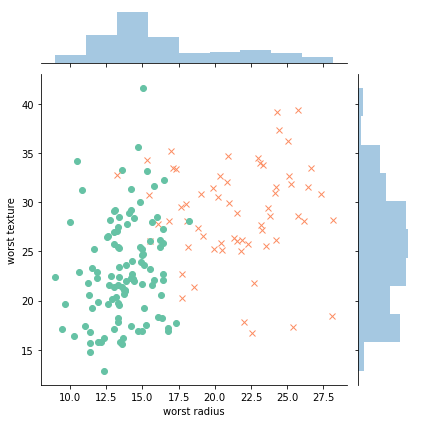

In [44]:
jplot = sns.jointplot('radius_worst', 'texture_worst', data=x_testing_plot)
jplot.ax_joint.cla() # Clear the scatter plot
j = 0
for i, row in x_testing_plot.iterrows():
    color = colors[0] if y_pred[j]=='B' else colors[1]
    marker = markers[0] if y_pred[j] == 'B' else markers[1]
    jplot.ax_joint.plot(row['radius_worst'], row['texture_worst'], color=color, marker=marker)
    j = j+1
jplot.set_axis_labels('worst radius', 'worst texture')

# Conclusion
Logistic Regression is taught often because it is a very useful tool.  Deep Learning modules may classify better, but logistic regression is definitely a good place to start.  Note that the implementation of the study on the tumors is relatively short, but could be very insightful in looking at risk measures for patients with certain tumor characteristics.